In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [ ]:
#supressing warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Data display customization
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',-1)


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving book.csv to book.csv


In [ ]:
#import dataset
data=pd.read_csv('/content/book.csv')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


EDA

Descriptive statistics

In [ ]:
# most popular items
count = data.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas    74 
ItalArt      97 
Florence     217
dtype: int64

In [ ]:
data.shape

(2000, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [ ]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

ChildBks
0    1154
1    846 
Name: ChildBks, dtype: int64

YouthBks
0    1505
1    495 
Name: YouthBks, dtype: int64

CookBks
0    1138
1    862 
Name: CookBks, dtype: int64

DoItYBks
0    1436
1    564 
Name: DoItYBks, dtype: int64

RefBks
0    1571
1    429 
Name: RefBks, dtype: int64

ArtBks
0    1518
1    482 
Name: ArtBks, dtype: int64

GeogBks
0    1448
1    552 
Name: GeogBks, dtype: int64

ItalCook
0    1773
1    227 
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1    74  
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1    97  
Name: ItalArt, dtype: int64

Florence
0    1783
1    217 
Name: Florence, dtype: int64



In [ ]:
print('The unique books sold are {}'.format(data.columns))
print("The number of unique books sold are {} ".format(data.columns.size))

The unique books sold are Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')
The number of unique books sold are 11 


In [ ]:
data1=data.iloc[:,0:11]

In [ ]:
data1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
data1.sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas    74 
ItalArt      97 
Florence     217
dtype: int64

In [ ]:
values=data1.sum()

### Data Visualization

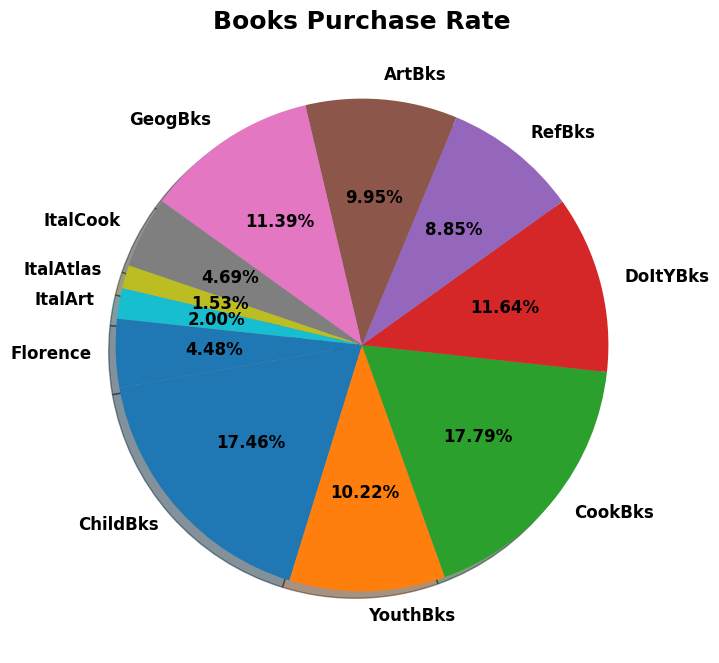

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(values,
       labels=data1.columns,

       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',

                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Books Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [ ]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


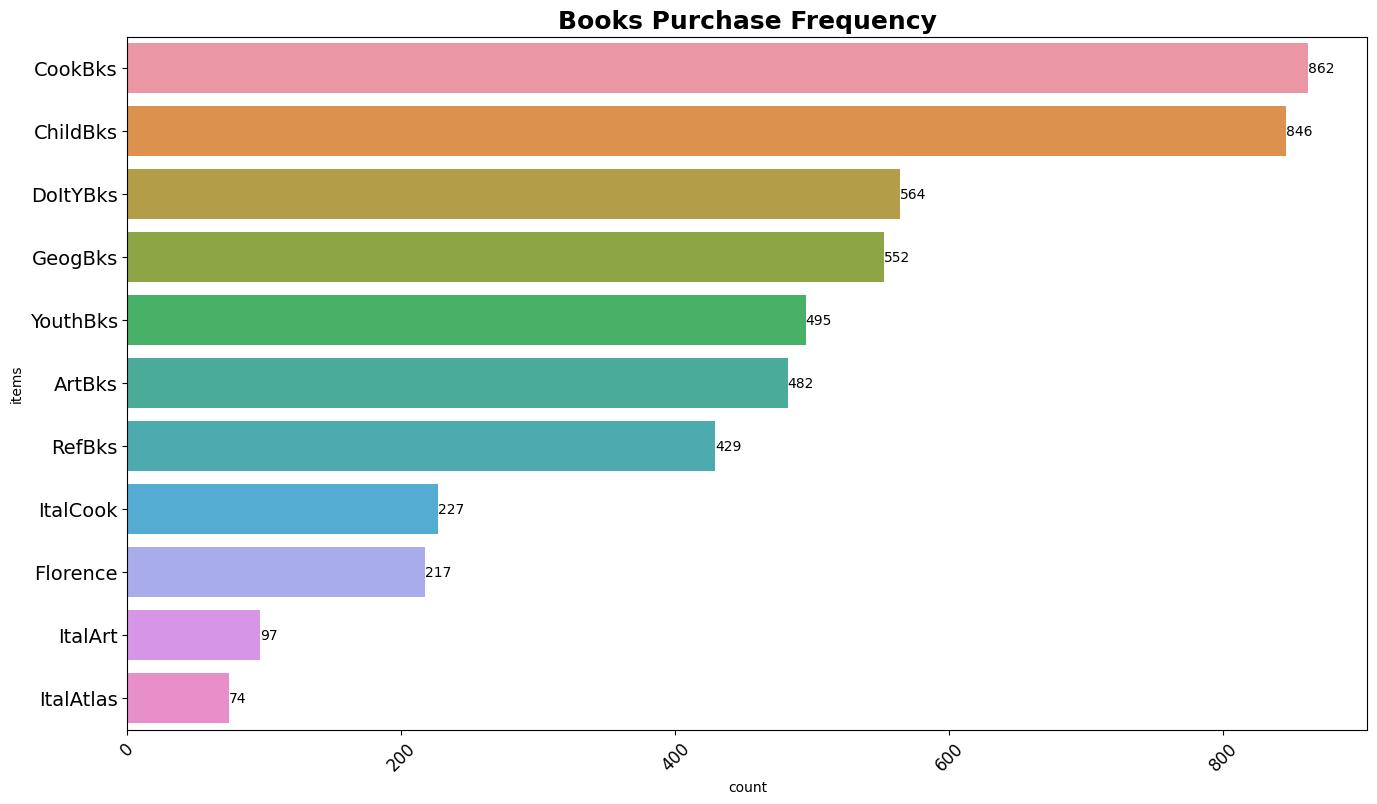

In [ ]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Books Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

Observations: Most Frequent Bought Books are : Cooking books and Child books

Support and Length If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.

In [ ]:
# Product Frequency / Total Sales
first = pd.DataFrame(data.sum() / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


In [ ]:
# Elimination by Support Value
first[first.Support >= 0.1]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085


In [ ]:
# Elimination by Support Value
first[first.Support >= 0.15]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145


In [ ]:
# Elimination by Support Value
first[first.Support >= 0.20]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145


Find support values for pair product combinations.

In [ ]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['CookBks', 'ChildBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'ArtBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'ItalCook'],
 ['CookBks', 'Florence'],
 ['CookBks', 'ItalArt'],
 ['CookBks', 'ItalAtlas']]

In [ ]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(CookBks, ChildBks)",0.2560,2
"(ChildBks, GeogBks)",0.1950,2
"(CookBks, GeogBks)",0.1925,2
"(CookBks, DoItYBks)",0.1875,2
"(ChildBks, DoItYBks)",0.1840,2
"(CookBks, ArtBks)",0.1670,2
"(ChildBks, YouthBks)",0.1650,2
"(ChildBks, ArtBks)",0.1625,2
"(CookBks, YouthBks)",0.1620,2


In [ ]:
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['CookBks', 'ChildBks', 'DoItYBks'],
 ['CookBks', 'ChildBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'Florence'],
 ['CookBks', 'ChildBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'ItalAtlas'],
 ['CookBks', 'DoItYBks', 'GeogBks']]

In [ ]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(CookBks, ChildBks, GeogBks)",0.1495,3
"(CookBks, ChildBks, DoItYBks)",0.1460,3
"(CookBks, ChildBks, YouthBks)",0.1290,3
"(CookBks, ChildBks, ArtBks)",0.1265,3
"(CookBks, ChildBks, RefBks)",0.1225,3
"(CookBks, DoItYBks, GeogBks)",0.1085,3
"(ChildBks, DoItYBks, GeogBks)",0.1045,3
"(CookBks, GeogBks, ArtBks)",0.1035,3
"(ChildBks, GeogBks, ArtBks)",0.1020,3


In [ ]:
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['CookBks', 'ChildBks', 'DoItYBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'Florence'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalAtlas'],
 ['CookBks', 'ChildBks', 'GeogBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'GeogBks', 'ArtBks']]

In [ ]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]

Association Rules There are two main functions here.
apriori() function evaluate support value for each product. association_rules() function help us to understand relationship between antecedents and consequences products. It gives some remarkable information about products. Especially, "antecedent support", "consequent support", "support", "confidence" and "lift" variables are very important to make some business decisions.

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

Support: The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :

Support(I)=Number of transactions containing I/Total number of Transactions

Confidence: This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.

Confidence(I1->I2)=Number of Transactions containing I1 and I2/(Total Number of Transactions containing I1)

Lift: Lift is the ratio between the confidence and support expressed as :

Lift(I1->I2)=Confidence(I1->I2)/Support(I2)

Association rules with 10% Support and 30% confidence

### With 10% Support

In [ ]:
# With 10% Support
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


Support value gives us these information: Head 5

42 percent of 100 purchases are ChildBks 24 percent of 100 purchases are YouthBks 43 percent of 100 purchases are CookBks 28 percent of 100 purchases are DoltYBks 21 percent of 100 purchases are RefBks Tail 5

10 percent of 100 purchases are ChildBks, GeogBks, DoItYBks 10 percent of 100 purchases are ChildBks, GeogBks, ArtBks 10 percent of 100 purchases are ArtBks, CookBks, DoItYBks 10 percent of 100 purchases are GeogBks, CookBks, DoItYBks 10 percent of 100 purchases are GeogBks, ArtBks, CookBks

### With 30% confidence

In [ ]:
# with 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
84,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
85,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
86,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
87,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


In [ ]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
71,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
72,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
78,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
75,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


### Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [ ]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
84,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
85,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
86,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
87,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


### Visualization of obtained rule

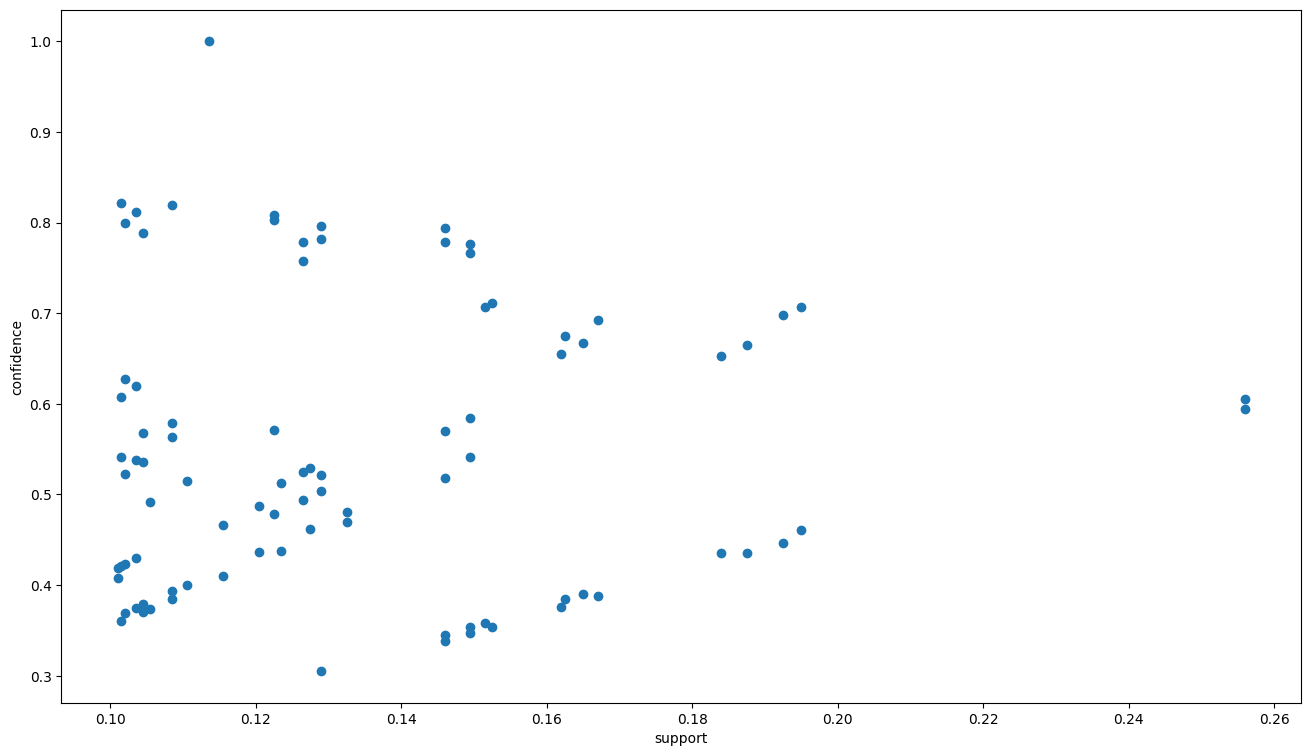

In [ ]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [ ]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(ChildBks),(YouthBks),(CookBks),(DoItYBks),(RefBks),(ArtBks),(GeogBks),"(CookBks, ChildBks)","(CookBks, YouthBks)","(DoItYBks, ChildBks)","(CookBks, DoItYBks)","(ChildBks, GeogBks)","(CookBks, GeogBks)","(ArtBks, ChildBks)","(ArtBks, CookBks)"
antecedents,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,1.518667,1.654846,NaN,1.693281,1.764017,2.035985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(ChildBks),NaN,1.576044,1.404179,1.542511,1.669725,1.594028,1.670264,NaN,1.882497,NaN,1.840820,NaN,1.835989,NaN,NaN
"(DoItYBks, GeogBks)",1.864490,NaN,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ChildBks, GeogBks)",NaN,NaN,1.778809,1.900346,NaN,2.170444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(CookBks, GeogBks)",1.835989,NaN,NaN,1.998711,NaN,2.230964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, ChildBks)",NaN,NaN,1.806175,NaN,NaN,NaN,2.274247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, CookBks)",1.790745,NaN,NaN,2.155264,NaN,NaN,2.245509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(RefBks, ChildBks)",NaN,NaN,1.876058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(RefBks, CookBks)",1.899004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'YouthBks'})"),
  Text(2.5, 0, "frozenset({'CookBks'})"),
  Text(3.5, 0, "frozenset({'DoItYBks'})"),
  Text(4.5, 0, "frozenset({'RefBks'})"),
  Text(5.5, 0, "frozenset({'ArtBks'})"),
  Text(6.5, 0, "frozenset({'GeogBks'})"),
  Text(7.5, 0, "frozenset({'CookBks', 'ChildBks'})"),
  Text(8.5, 0, "frozenset({'CookBks', 'YouthBks'})"),
  Text(9.5, 0, "frozenset({'DoItYBks', 'ChildBks'})"),
  Text(10.5, 0, "frozenset({'CookBks', 'DoItYBks'})"),
  Text(11.5, 0, "frozenset({'ChildBks', 'GeogBks'})"),
  Text(12.5, 0, "frozenset({'CookBks', 'GeogBks'})"),
  Text(13.5, 0, "frozenset({'ArtBks', 'ChildBks'})"),
  Text(14.5, 0, "frozenset({'ArtBks', 'CookBks'})")])

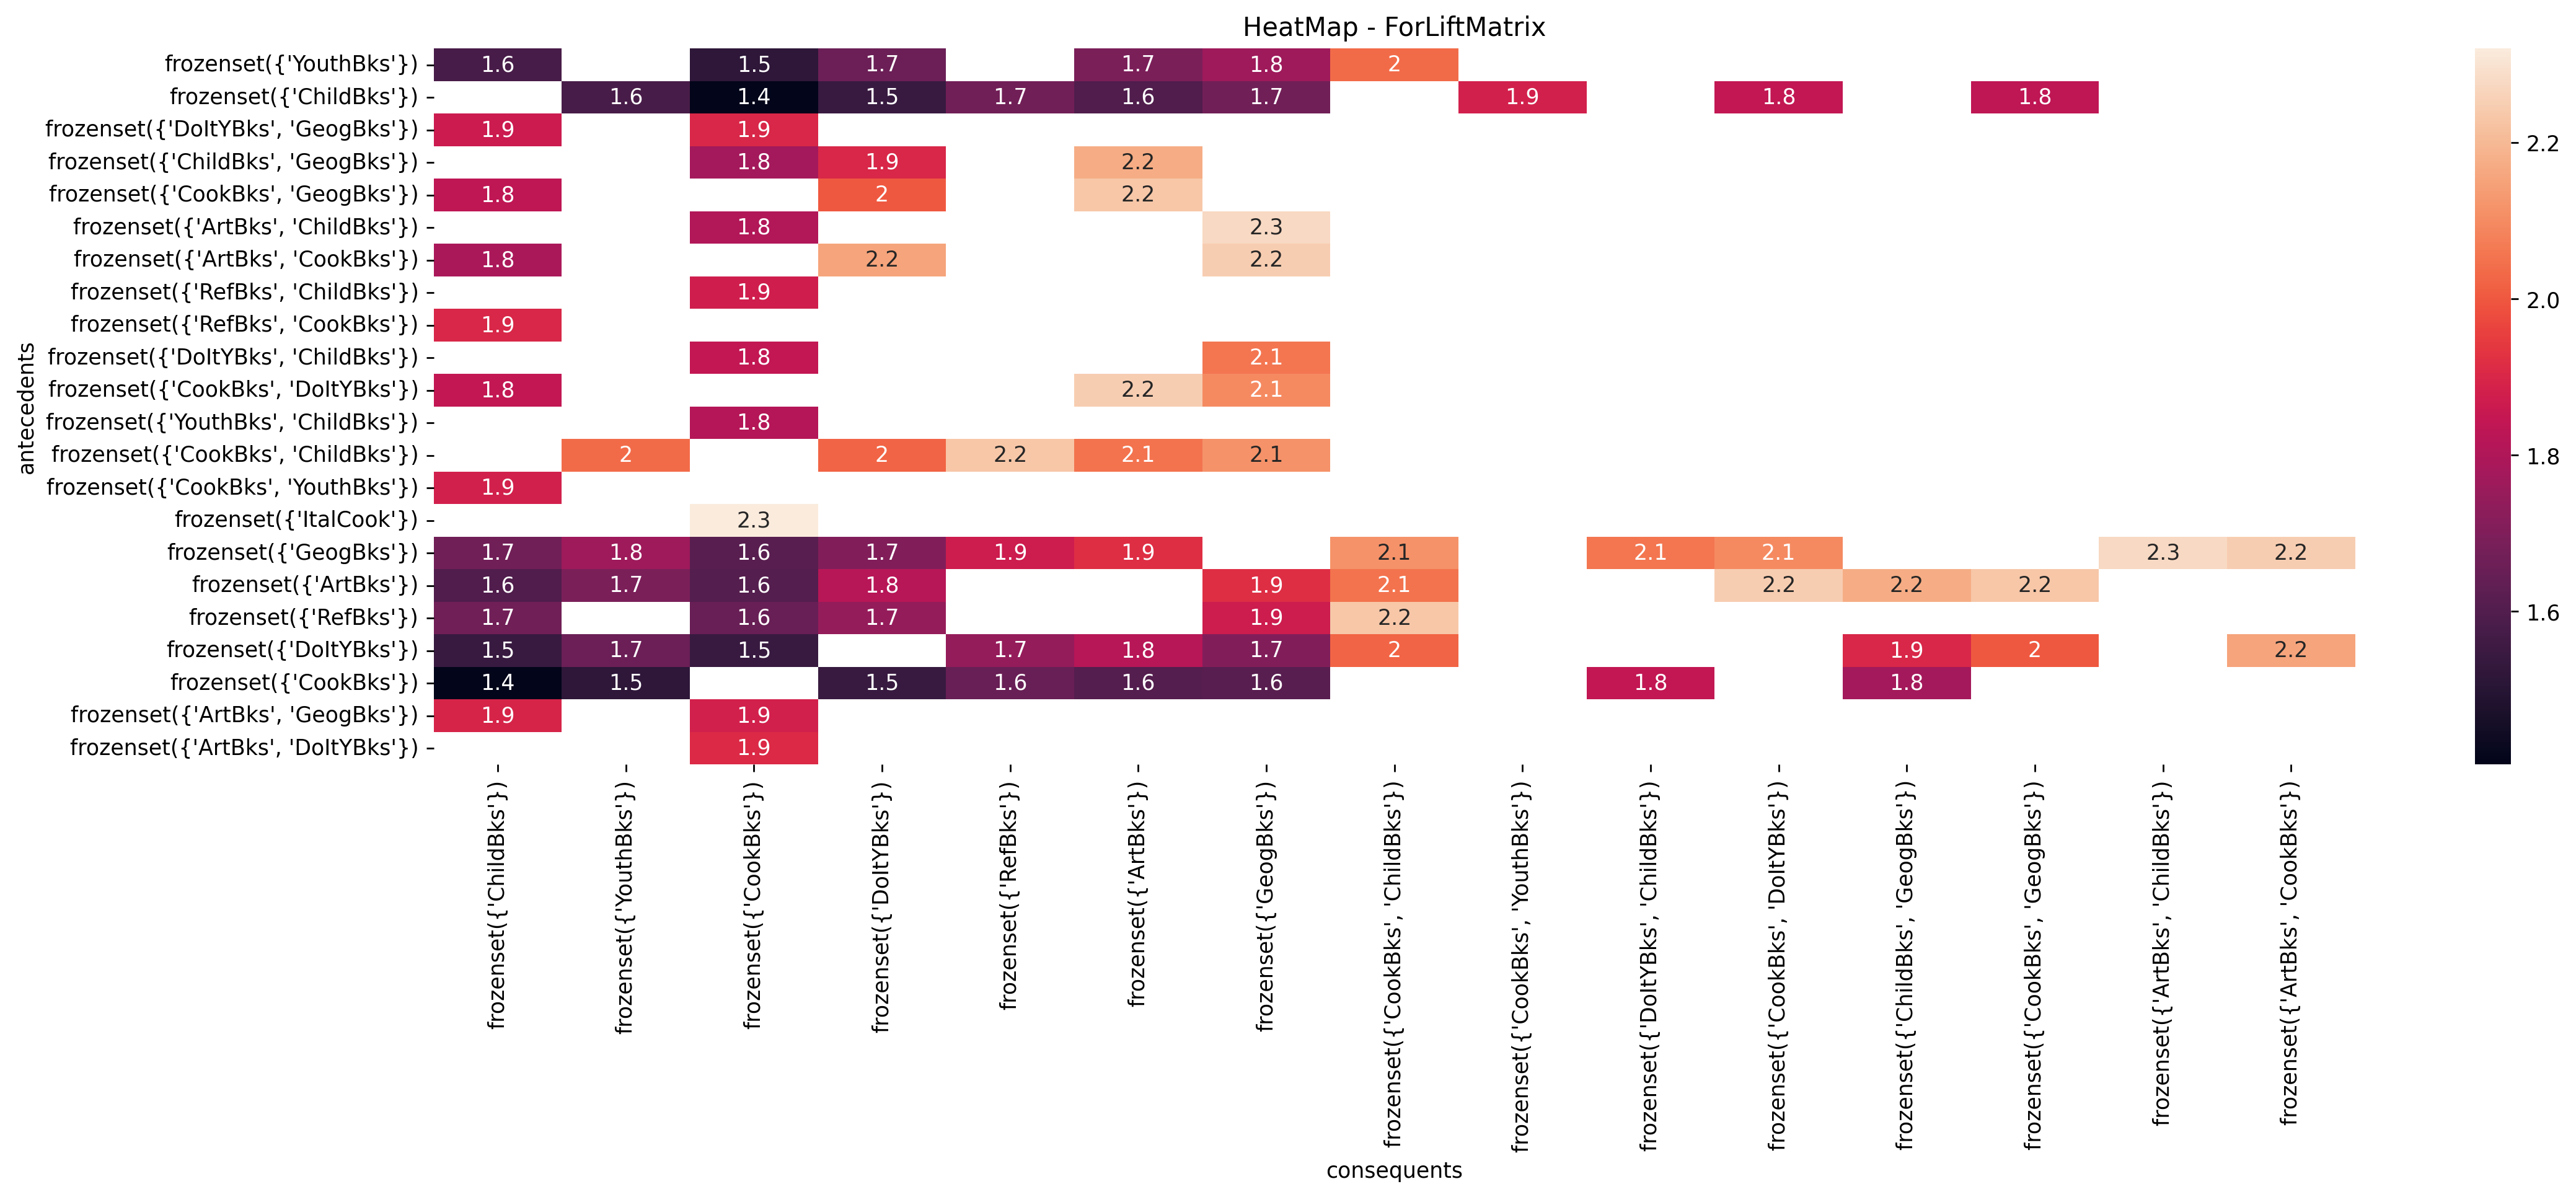

In [ ]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

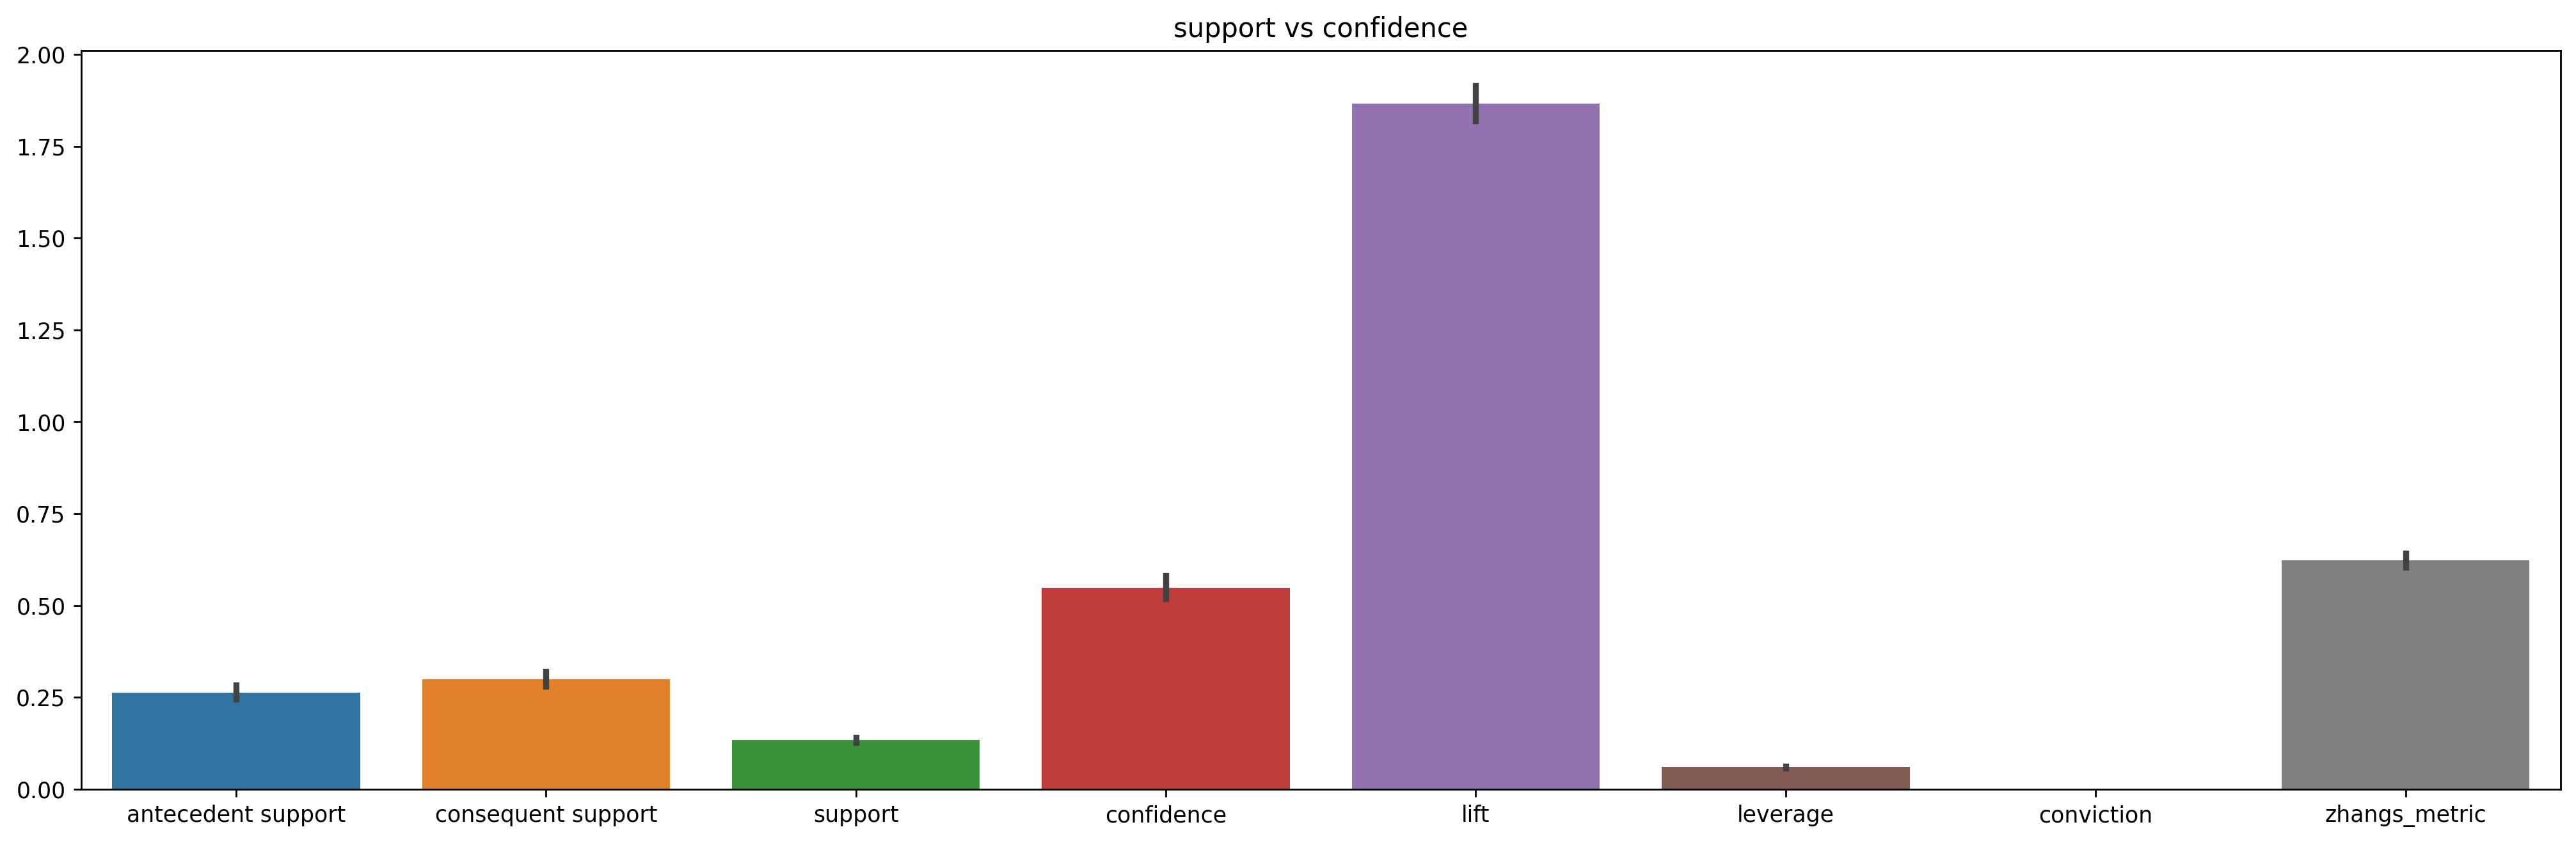

In [ ]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot(data=lift)
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

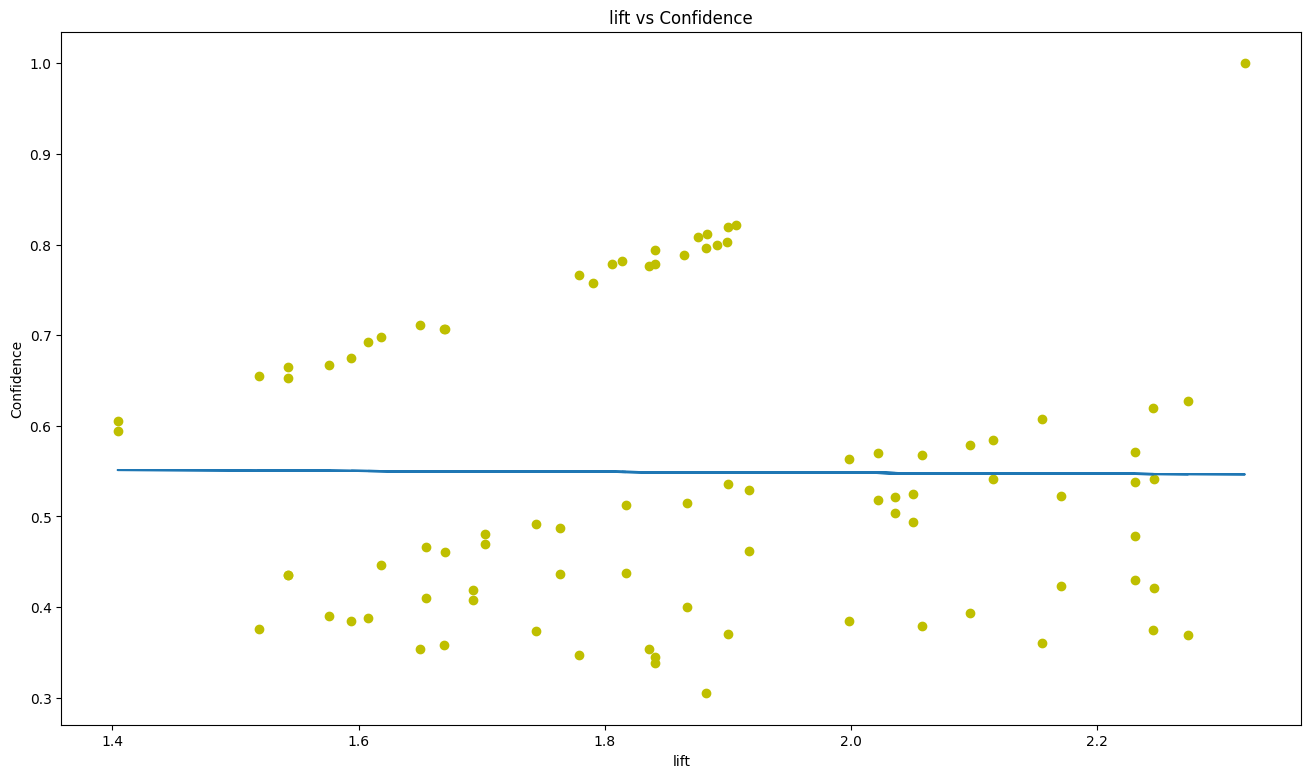

In [ ]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

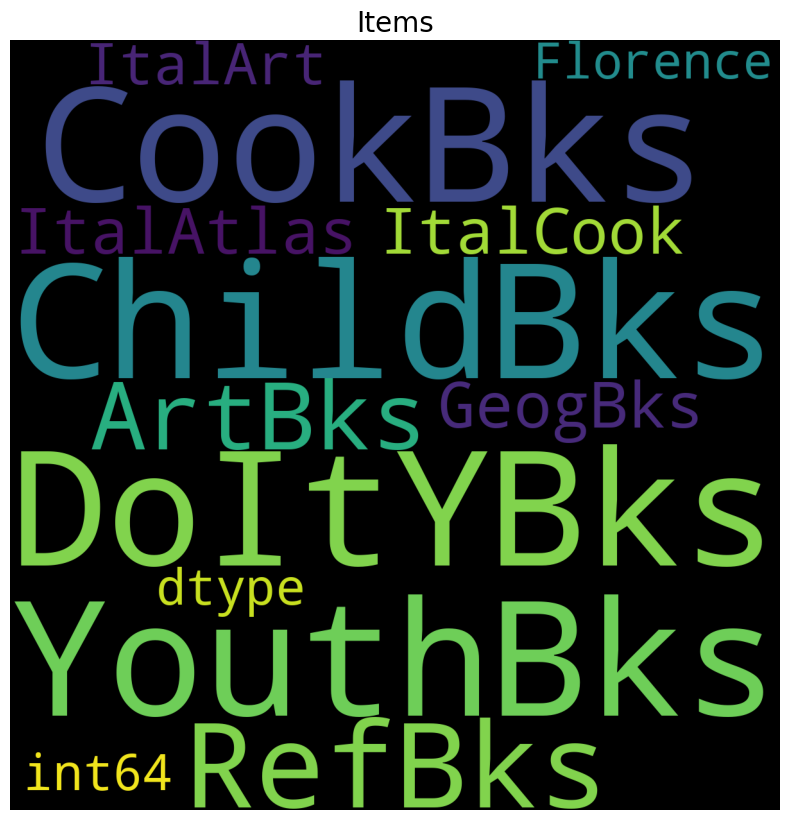

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10,10)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(str(data.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

### Association rules with 15% Support and 40% confidence

In [ ]:
# With 15% Support
frequent_itemsets=apriori(data,min_support=0.15,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(CookBks, ChildBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2


In [ ]:
# with 40% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(ChildBks),(DoItYBks),0.4230,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
7,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
8,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858


In [ ]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
7,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
12,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
14,(CookBks),(GeogBks),0.4310,0.276,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
15,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
13,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
10,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939


### Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [ ]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(ChildBks),(DoItYBks),0.4230,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
7,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
8,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858


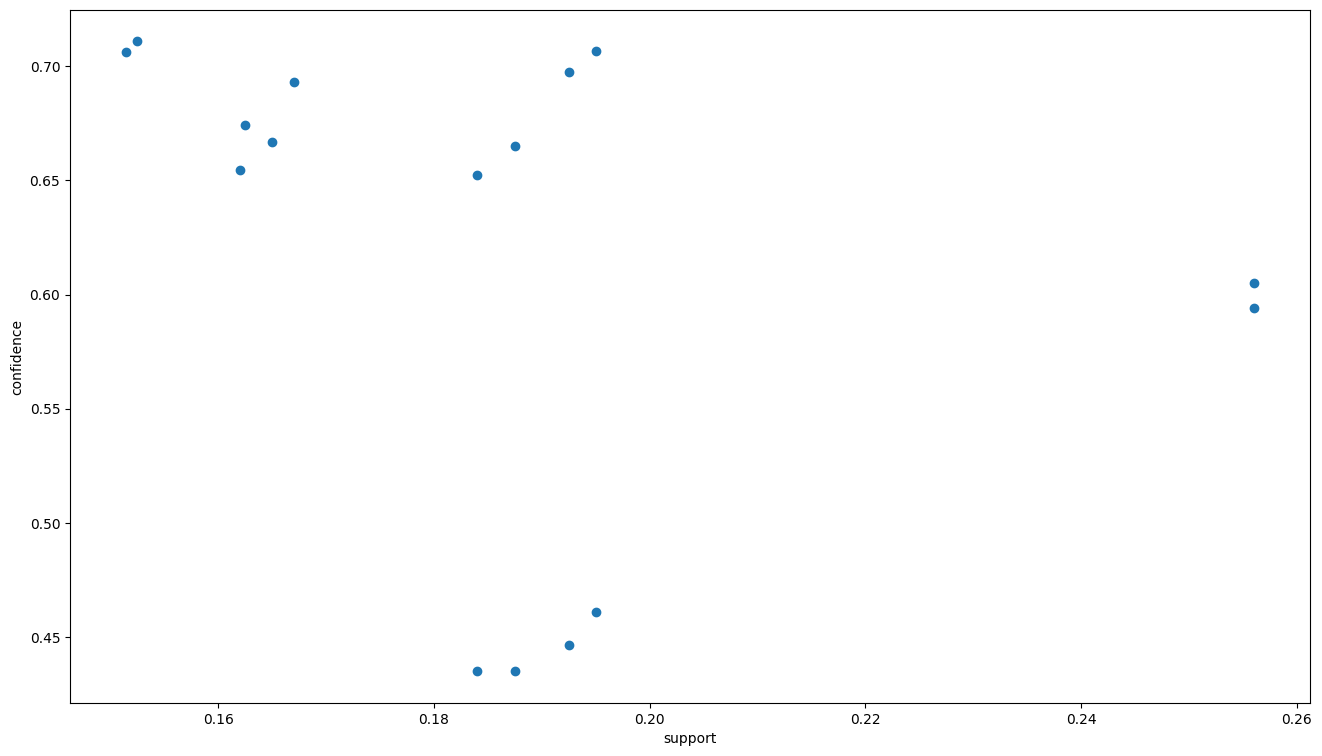

In [ ]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [ ]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(ChildBks),(CookBks),(DoItYBks),(GeogBks)
antecedents,,,,
(YouthBks),1.576044,1.518667,NaN,NaN
(CookBks),1.404179,NaN,1.542677,1.618245
(ChildBks),NaN,1.404179,1.542511,1.670264
(DoItYBks),1.542511,1.542677,NaN,NaN
(RefBks),1.669725,1.649549,NaN,NaN
(ArtBks),1.594028,1.607763,NaN,NaN
(GeogBks),1.670264,1.618245,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'CookBks'})"),
  Text(2.5, 0, "frozenset({'DoItYBks'})"),
  Text(3.5, 0, "frozenset({'GeogBks'})")])

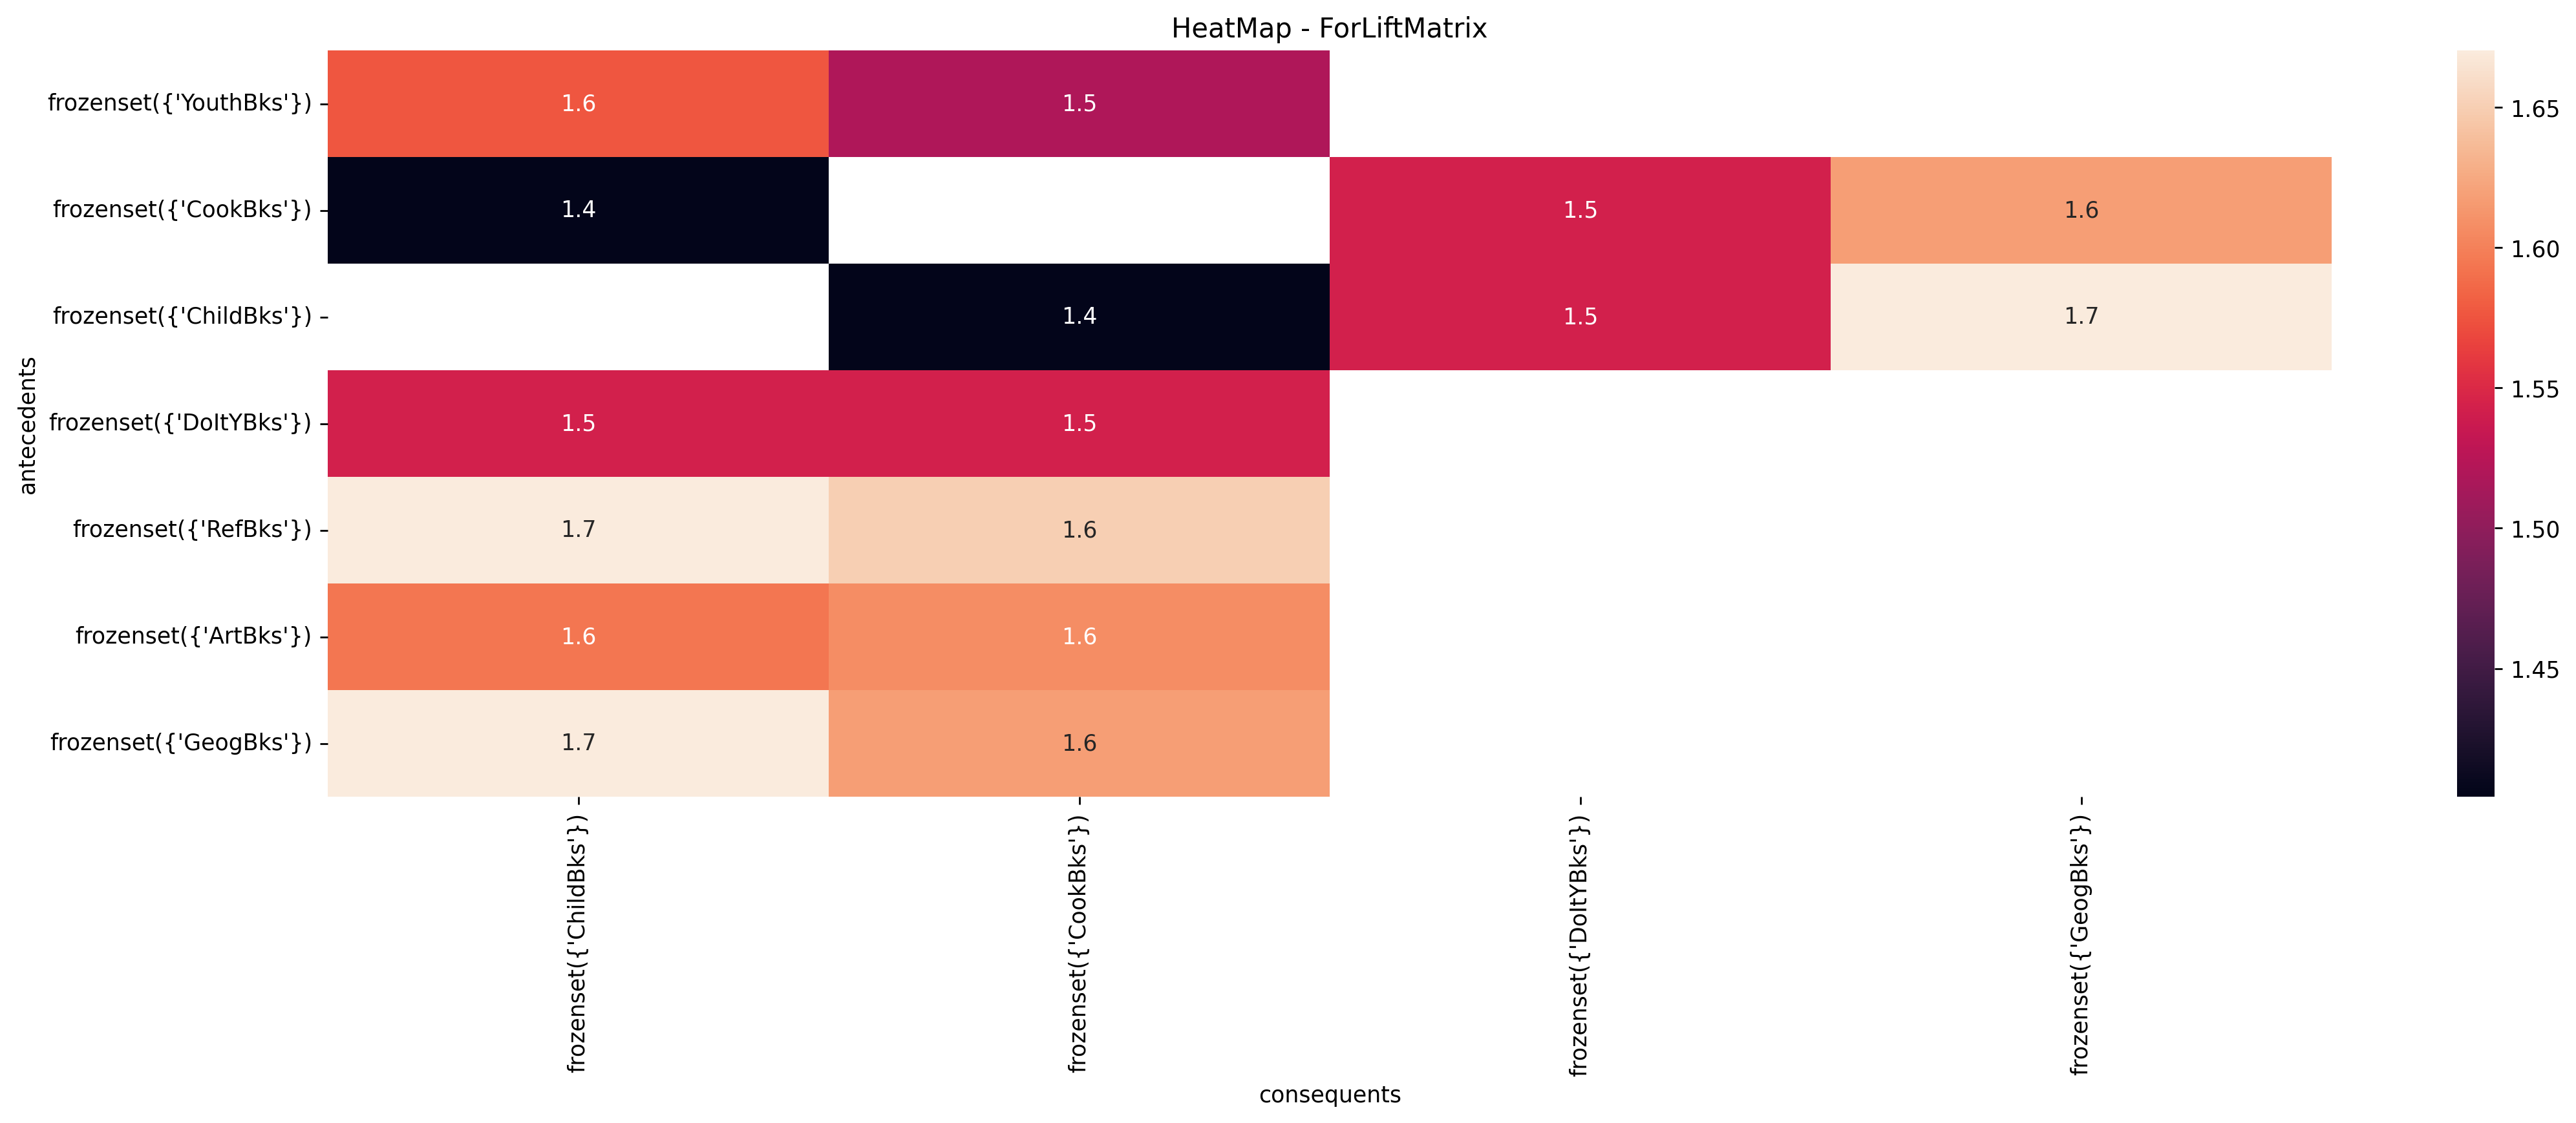

In [ ]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'lift vs Confidence')

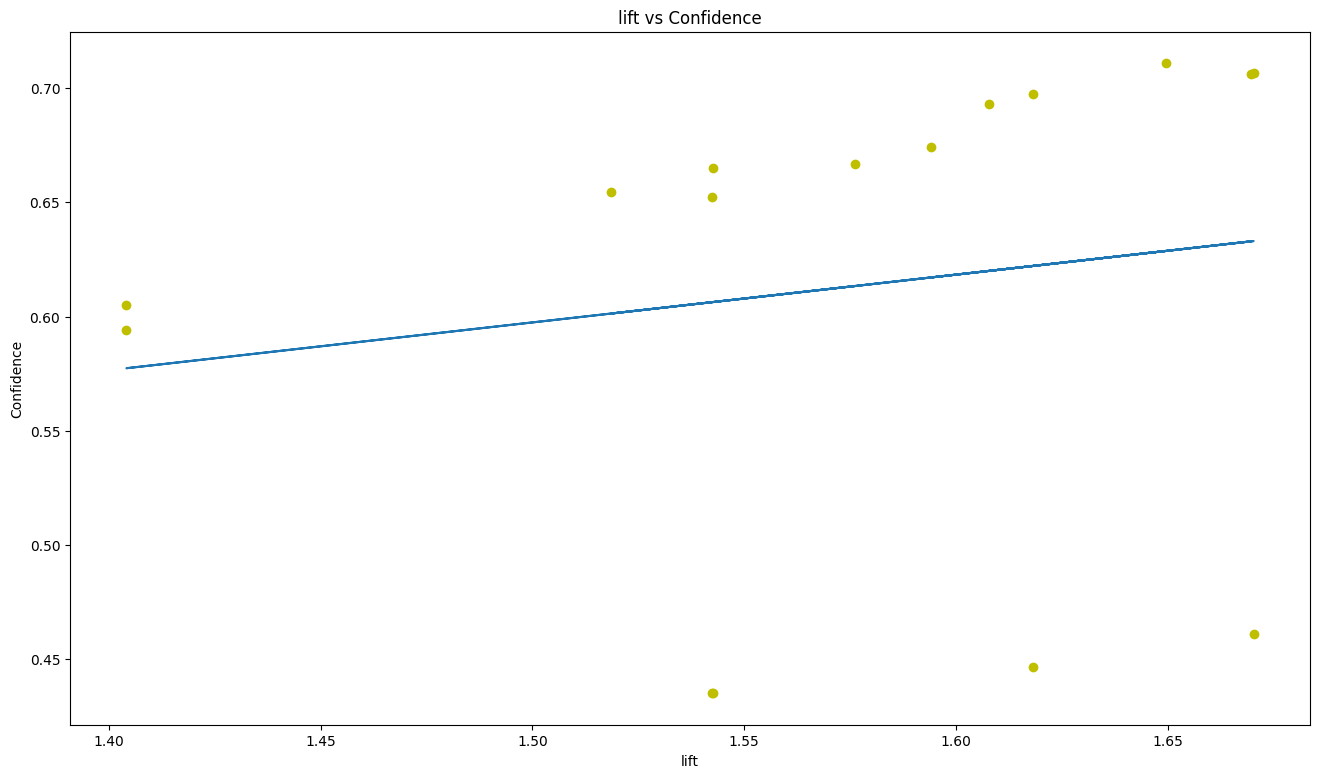

In [ ]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

### Association rules with 20% Support and 60% confidence

In [ ]:
# With 20% Support
frequent_itemsets=apriori(data,min_support=0.2,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [ ]:
# with 60% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


In [ ]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


### Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [ ]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


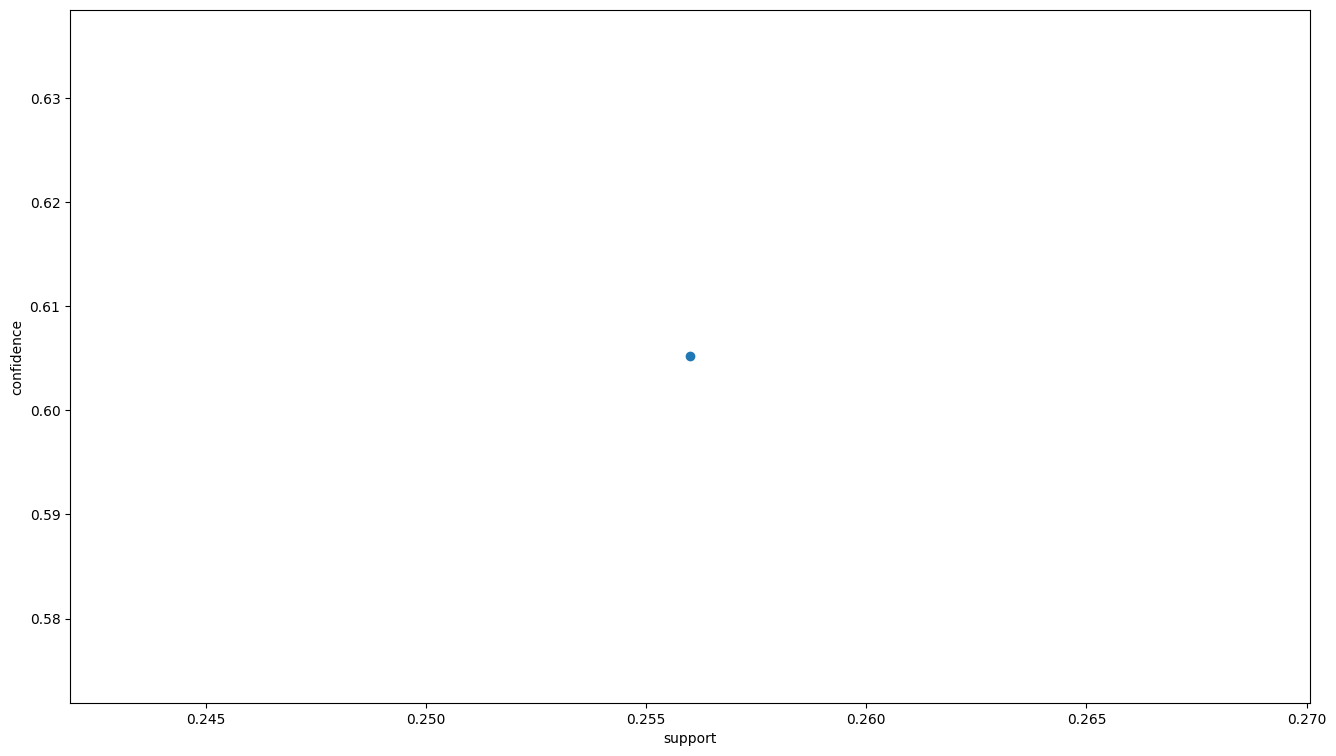

In [ ]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [ ]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(CookBks)
antecedents,
(ChildBks),1.404179


(array([0.5]), [Text(0.5, 0, "frozenset({'CookBks'})")])

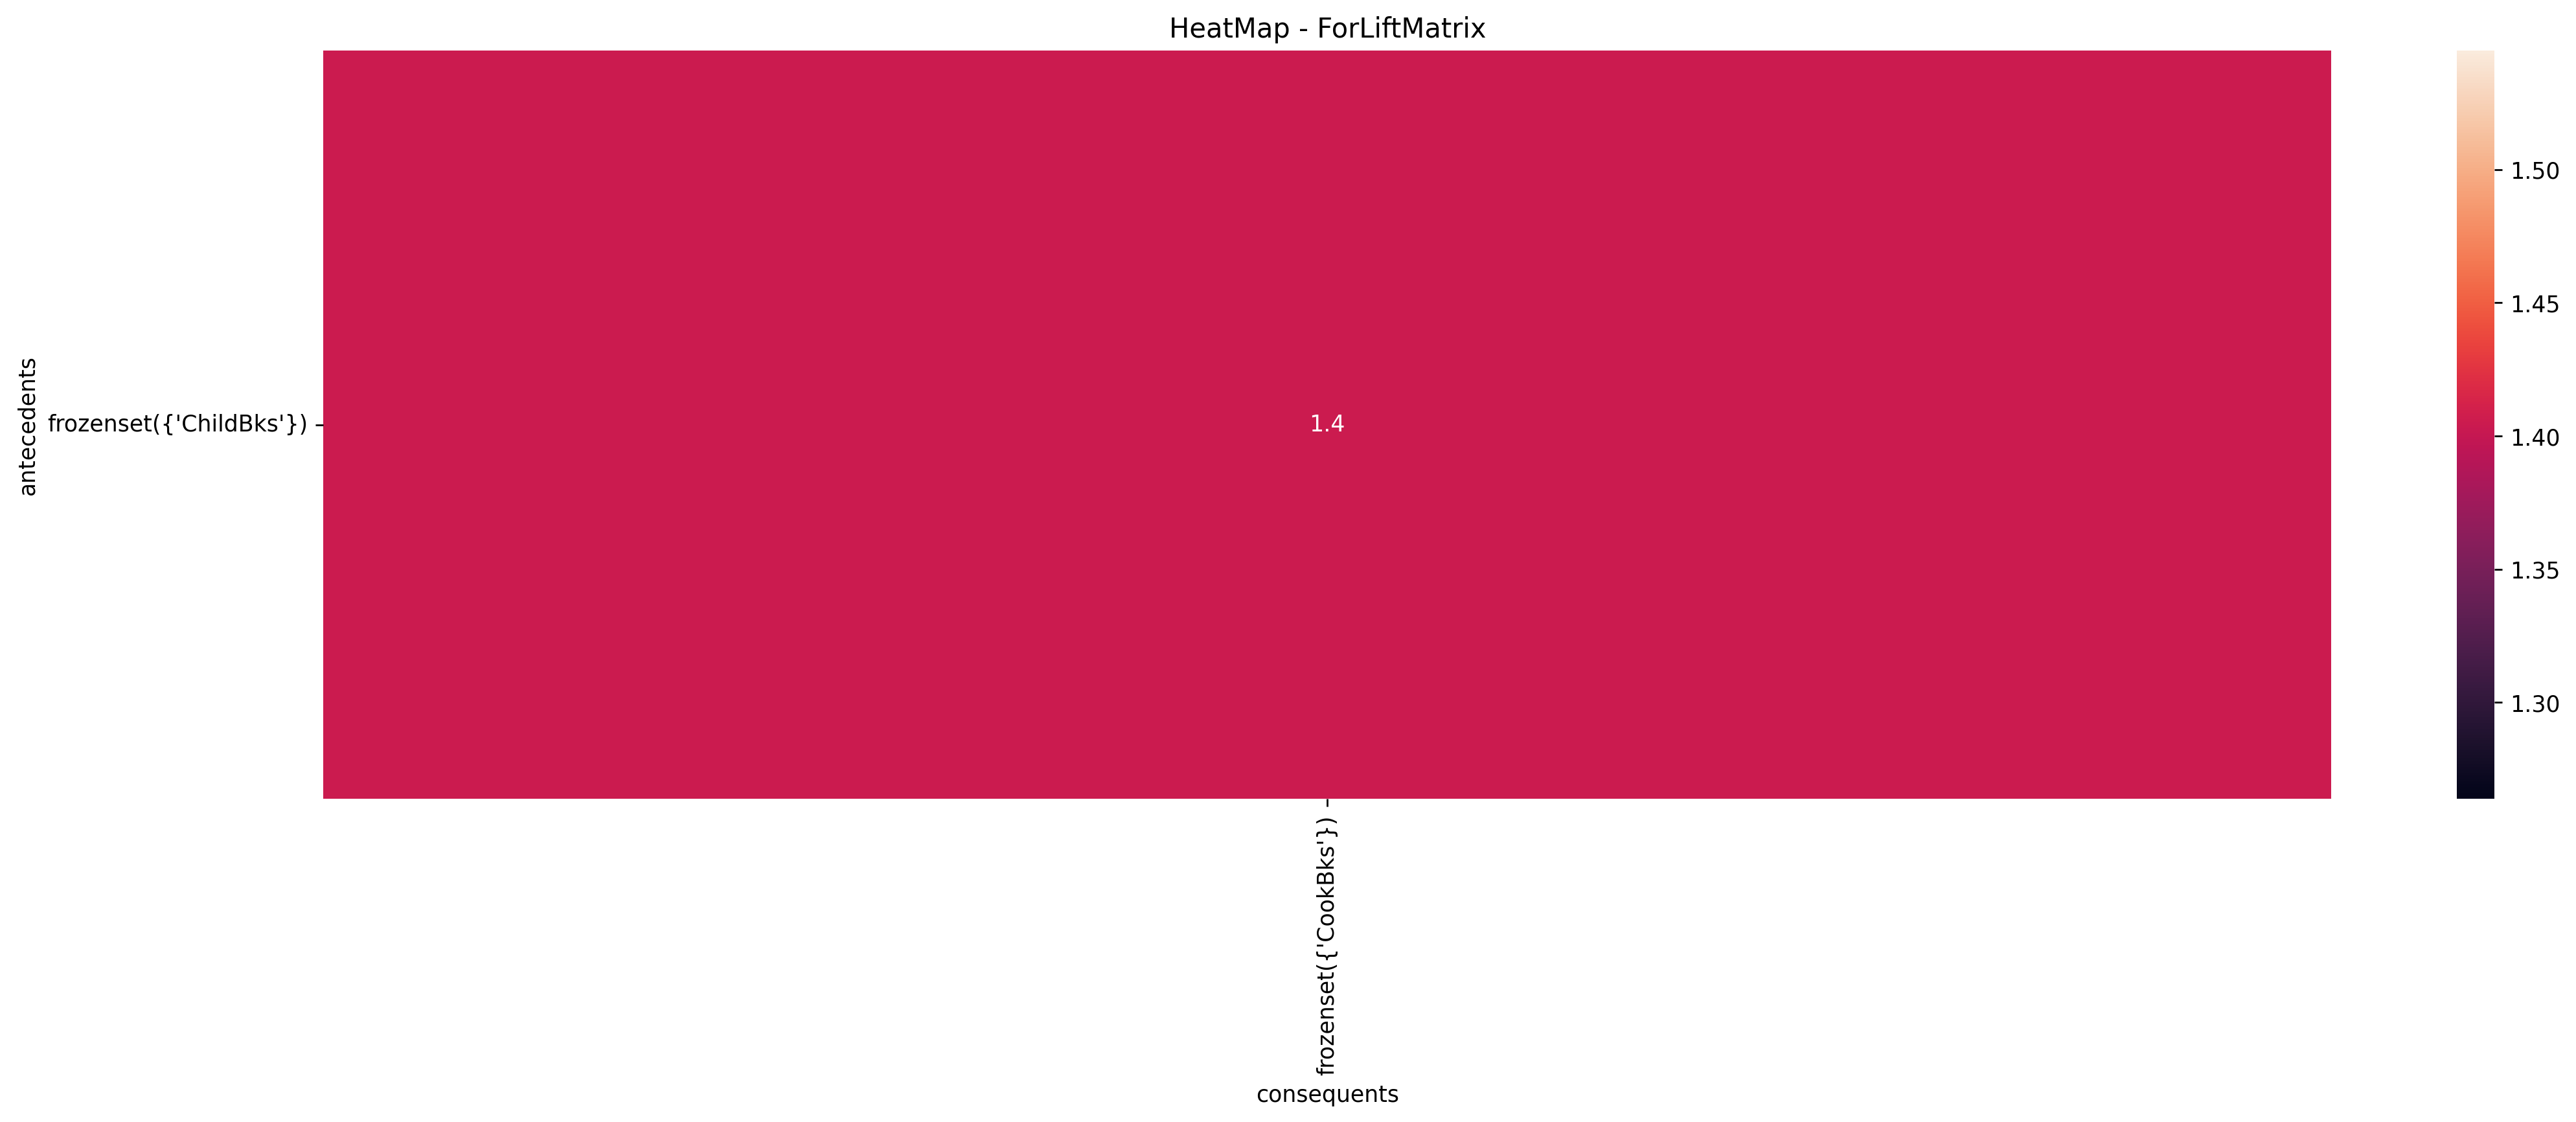

In [ ]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)